In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (42.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [5]:
import pandas as pd

df = pd.read_csv('/content/sample_data/card.csv', encoding='euc-kr')

# 데이터 확인
print(df.head())

       연월         업종명 이용자구분    성별  이용자수  이용건수       이용금액
0  201801  건강보조식품 소매업  기타외국  알수없음    65    78  101523250
1  201801  건강보조식품 소매업   내국인    남성   159   165   25558470
2  201801  건강보조식품 소매업   내국인  알수없음     1     1     396000
3  201801  건강보조식품 소매업   내국인    여성   200   218   32041740
4  201801  건강보조식품 소매업   동남아  알수없음     8     8    1550000


In [6]:
df

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000
...,...,...,...,...,...,...,...
20639,202310,휴양콘도 운영업,법인,알수없음,2084,4413,2208853529
20640,202310,휴양콘도 운영업,제주도민,남성,897,1118,64997332
20641,202310,휴양콘도 운영업,제주도민,알수없음,1,1,4000
20642,202310,휴양콘도 운영업,제주도민,여성,967,1169,86172869


In [7]:
df['연월'] = pd.to_datetime(df['연월'], format='%Y%m')

# 월별 이용금액 합계 계산
monthly_sum = df.groupby(df['연월'].dt.to_period("M"))['이용금액'].sum()

# 결과 출력
print(monthly_sum)

연월
2018-01    154220268710
2018-02    145254284752
2018-03    157899376930
2018-04    169325413360
2018-05    177381020615
               ...     
2023-06    165290700486
2023-07    161731013078
2023-08    177449863504
2023-09    168550932947
2023-10    176256974597
Freq: M, Name: 이용금액, Length: 70, dtype: int64


In [9]:
monthly_sum_df = monthly_sum.reset_index()

# 결과 출력
print(monthly_sum_df)

         연월          이용금액
0   2018-01  154220268710
1   2018-02  145254284752
2   2018-03  157899376930
3   2018-04  169325413360
4   2018-05  177381020615
..      ...           ...
65  2023-06  165290700486
66  2023-07  161731013078
67  2023-08  177449863504
68  2023-09  168550932947
69  2023-10  176256974597

[70 rows x 2 columns]


In [10]:
monthly_sum_df

,연월,이용금액
0,2018-01,154220268710
1,2018-02,145254284752
2,2018-03,157899376930
3,2018-04,169325413360
4,2018-05,177381020615
...,...,...
65,2023-06,165290700486
66,2023-07,161731013078
67,2023-08,177449863504
68,2023-09,168550932947


In [29]:
monthly_sum_df['amount'] = monthly_sum_df['이용금액']

In [33]:
monthly_sum_df = monthly_sum_df.drop(columns=['이용금액'])

In [27]:
!sudo apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


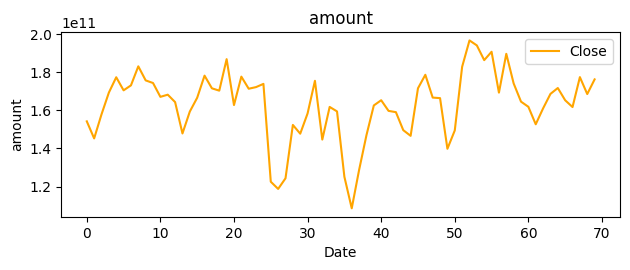

In [34]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # NanumGothic 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.subplot(2, 1, 1)
plt.plot(monthly_sum_df.index, monthly_sum_df['amount'], label='Close', color='orange')
plt.title('amount')
plt.xlabel('Date')
plt.ylabel('amount')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
monthly_sum_df

,연월,amount
0,2018-01,154220268710
1,2018-02,145254284752
2,2018-03,157899376930
3,2018-04,169325413360
4,2018-05,177381020615
...,...,...
65,2023-06,165290700486
66,2023-07,161731013078
67,2023-08,177449863504
68,2023-09,168550932947


Epoch 1/50
2/2 [==============================] - 2s 311ms/step - loss: 0.3450 - val_loss: 0.3290
Epoch 2/50
2/2 [==============================] - 0s 38ms/step - loss: 0.3131 - val_loss: 0.2894
Epoch 3/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2806 - val_loss: 0.2509
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.2494 - val_loss: 0.2137
Epoch 5/50
2/2 [==============================] - 0s 39ms/step - loss: 0.2190 - val_loss: 0.1769
Epoch 6/50
2/2 [==============================] - 0s 40ms/step - loss: 0.1884 - val_loss: 0.1411
Epoch 7/50
2/2 [==============================] - 0s 36ms/step - loss: 0.1581 - val_loss: 0.1063
Epoch 8/50
2/2 [==============================] - 0s 38ms/step - loss: 0.1294 - val_loss: 0.0738
Epoch 9/50
2/2 [==============================] - 0s 41ms/step - loss: 0.1015 - val_loss: 0.0455
Epoch 10/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0776 - val_loss: 0.0240
Epoch 11/50
2/2 [===========

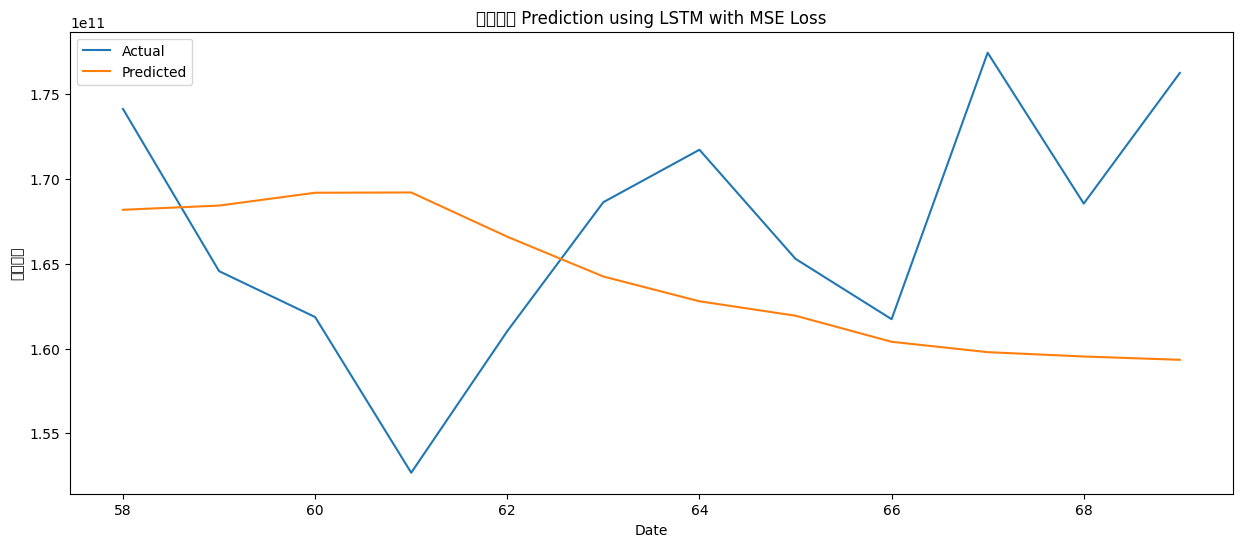

In [37]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# amount 열을 타겟으로 설정
target_col = 'amount'

# NaN 값 채우기 (예제에서는 평균값 사용)
monthly_sum_df = monthly_sum_df.fillna(monthly_sum_df.mean())

# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_sum_df[[target_col]])

# 시퀀스 데이터 생성
sequence_length = 10

sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length, 0]
    label = scaled_data[i + sequence_length, 0]
    sequences.append(seq)
    target.append(label)

X = np.array(sequences)
y = np.array(target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 (Mean Squared Error를 손실 함수로 사용)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict(X_test)

# 정규화된 예측값을 역정규화
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(monthly_sum_df.index[-len(predictions):], y_test_actual, label='Actual')
plt.plot(monthly_sum_df.index[-len(predictions):], predictions, label='Predicted')
plt.title('이용금액 Prediction using LSTM with MSE Loss')
plt.xlabel('Date')
plt.ylabel('이용금액')
plt.legend()
plt.show()


Epoch 1/50
2/2 [==============================] - 2s 290ms/step - loss: 0.0647 - val_loss: 0.0191
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0524 - val_loss: 0.0225
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0494 - val_loss: 0.0139
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0444 - val_loss: 0.0109
Epoch 5/50
2/2 [==============================] - 0s 36ms/step - loss: 0.0413 - val_loss: 0.0103
Epoch 6/50
2/2 [==============================] - 0s 34ms/step - loss: 0.0403 - val_loss: 0.0102
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0380 - val_loss: 0.0100
Epoch 8/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0371 - val_loss: 0.0100
Epoch 9/50
2/2 [==============================] - 0s 32ms/step - loss: 0.0360 - val_loss: 0.0104
Epoch 10/50
2/2 [==============================] - 0s 33ms/step - loss: 0.0351 - val_loss: 0.0110
Epoch 11/50
2/2 [===========

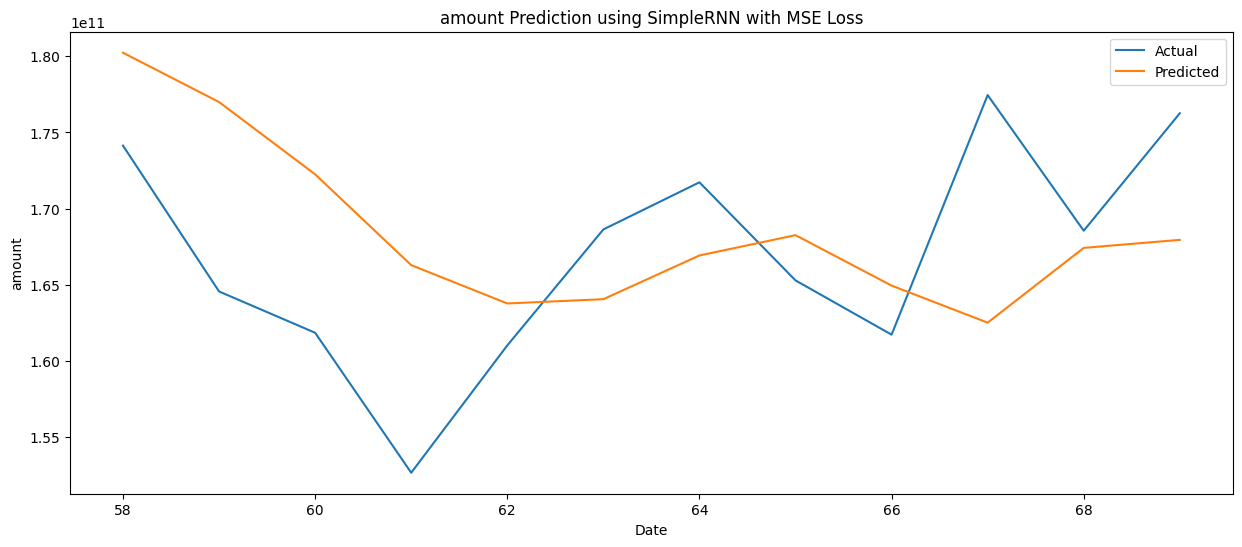

In [38]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.callbacks import EarlyStopping

# amount 열을 타겟으로 설정
target_col = 'amount'

# NaN 값 채우기 (예제에서는 평균값 사용)
monthly_sum_df = monthly_sum_df.fillna(monthly_sum_df.mean())

# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(monthly_sum_df[[target_col]])

# 시퀀스 데이터 생성
sequence_length = 10

sequences = []
target = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i + sequence_length, 0]
    label = scaled_data[i + sequence_length, 0]
    sequences.append(seq)
    target.append(label)

X = np.array(sequences)
y = np.array(target)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# SimpleRNN 모델 생성
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

# 모델 컴파일 (Mean Squared Error를 손실 함수로 사용)
model.compile(optimizer='adam', loss='mse')  # MSE 사용 (회귀 문제)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {loss}')

# 예측 수행
predictions = model.predict(X_test)

# 정규화된 예측값을 역정규화
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(monthly_sum_df.index[-len(predictions):], y_test_actual, label='Actual')
plt.plot(monthly_sum_df.index[-len(predictions):], predictions, label='Predicted')
plt.title('amount Prediction using SimpleRNN with MSE Loss')
plt.xlabel('Date')
plt.ylabel('amount')
plt.legend()
plt.show()
